In [1]:
import  pandas as pd
from matplotlib import pyplot as plt
import pandas_profiling
import numpy as np
import matplotlib
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/Users/keumhyeonjun/Projects/행안부/주차/출입.신화.샘플(2022.10.21)/tbl_hist_access.csv')
df

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/2180240044.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/keumhyeonjun/Projects/행안부/주차/출입.신화.샘플(2022.10.21)/tbl_hist_access.csv')


,seq,site_cd,site_nm,reader_cd,reader_nm,event_msg,card_no,regstatus_cd,regstatus_nm,emp_no,...,department_nm,position_cd,position_nm,msgTime,insertedDate,rev1,rev2,rev3,rev4,rev5
0,308341342,SJ01-01,1동,0805R,1-B동 1층 스피드게이트2 출구,Grant access,0000010920001116,RegStatus0001,등록,1001784,...,산업과학중기정책관,Position0002,서기관,2022-10-04 00:00:02.000,2022-10-04 00:00:02.887,0805R,NaN,NaN,NaN,N
1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,1148624,...,경영인력과,NaN,NaN,2022-10-04 00:00:03.000,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N
2,308341344,"SJ02-02-L,M","14,15동",L0104a-15R,14-2동 스피드 게이트 4 - OUT,Grant access,0000013420001683,RegStatus0001,등록,1027314,...,반부패청렴담당관,NaN,NaN,2022-10-04 00:00:03.000,2022-10-04 00:00:03.903,L0104a-15R,NaN,NaN,NaN,N
3,308341347,SJ03-02-Q,"16,17동",R0102-00R,17동 행안부 1층 보안자동문,Grant access,0000017410001579,RegStatus0001,등록,1247096,...,상황담당관,NaN,NaN,2022-10-04 00:00:03.000,2022-10-04 00:00:13.480,R0102-00R,NaN,NaN,NaN,N
4,308341346,"SJ02-02-L,M","14,15동",L0104a-13R,14-2동 스피드 게이트 2 - OUT,Grant access,0000013420001739,RegStatus0001,등록,1151695,...,반부패청렴담당관,NaN,NaN,2022-10-04 00:00:06.000,2022-10-04 00:00:07.053,L0104a-13R,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875203,310216544,SJ01-02-A,6동,A0107-19R,6동 1층 로비2 스피드게이트1 OUT,Grant access,00000000BC34FDCD,RegStatus0001,등록,90118750,...,일반출입증,NaN,NaN,2022-10-20 23:59:57.000,2022-10-20 23:59:56.430,A0107-19R,NaN,NaN,NaN,N
1875204,310216546,SJ01-02-A,6동,A0107-17R,6동 1층 로비2 스피드게이트3 OUT,Grant access,0000148000010912,RegStatus0001,등록,1048673,...,물이용기획과,NaN,NaN,2022-10-20 23:59:57.000,2022-10-20 23:59:58.007,A0107-17R,NaN,NaN,NaN,N
1875205,310216548,SJ01-02-A,6동,A0107-18R,6동 1층 로비2 스피드게이트2 OUT,Grant access,0000017401105223,RegStatus0008,입실,공무-163,...,물이용기획과,Position0183,미지정,2022-10-20 23:59:57.000,2022-10-20 23:59:58.537,A0107-18R,NaN,NaN,NaN,N
1875206,310216555,"SJ02-02-L,M","14,15동",L0104a-12R,14-2동 스피드 게이트 1 - OUT,Grant access,0000013420002020,RegStatus0001,등록,1133546,...,교육정보화과,NaN,NaN,2022-10-20 23:59:57.000,2022-10-20 23:59:58.980,L0104a-12R,NaN,NaN,NaN,N


In [3]:
df.reset_index(inplace=True)
df.index=pd.to_datetime(df['msgTime'])
df.drop('msgTime', axis=1, inplace=True)

night = df.between_time('23:30:00','06:30:00')
night['night'] = 1
df = pd.merge(df, night['night'], left_on='msgTime', right_on='msgTime', how='left')
df['night'] = df['night'].fillna(0)
df.head()

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/3067382713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['night'] = 1


,index,seq,site_cd,site_nm,reader_cd,reader_nm,event_msg,card_no,regstatus_cd,regstatus_nm,...,department_nm,position_cd,position_nm,insertedDate,rev1,rev2,rev3,rev4,rev5,night
msgTime,,,,,,,,,,,,,,,,,,,,,
2022-10-04 00:00:02,0,308341342,SJ01-01,1동,0805R,1-B동 1층 스피드게이트2 출구,Grant access,0000010920001116,RegStatus0001,등록,...,산업과학중기정책관,Position0002,서기관,2022-10-04 00:00:02.887,0805R,NaN,NaN,NaN,N,1.0
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,경영인력과,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,경영인력과,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,경영인력과,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0
2022-10-04 00:00:03,2,308341344,"SJ02-02-L,M","14,15동",L0104a-15R,14-2동 스피드 게이트 4 - OUT,Grant access,0000013420001683,RegStatus0001,등록,...,반부패청렴담당관,NaN,NaN,2022-10-04 00:00:03.903,L0104a-15R,NaN,NaN,NaN,N,1.0


In [4]:
df['reader_nm'].value_counts()

6동 1층 로비2 스피드게이트3 OUT    18663
6동 1층 로비3 스피드게이트1 OUT    17916
국세청 A 스피드게이트1-OUT        16812
4동 1층 스피드 게이트3 OUT       16518
5동 로비2 스피드게이트1 OUT       16492
                         ...  
5동 421호 EPS                  1
5동 304호 TPS1                 1
5동 362호 TPS2                 1
2동 3층 계단실2 EPS               1
13-2동 1F 로비 연결통로             1
Name: reader_nm, Length: 2823, dtype: int64

In [5]:
job_nm_first = []
for i in range(len(df)):
    text = df['reader_nm'][i]
    if len(text.split()) >= 2:
        first, *middle, last = text.split()
        job_nm_first.append(first)
    else :
        job_nm_first.append(text)

In [7]:
df['reader_nm_fisrt']=job_nm_first


In [14]:
df['site_nm'].value_counts()

6동          322138
16,17동      311526
2,3,4동      262983
9,10,11동    240618
5동          186643
14,15동      166196
7,8동        163533
12,13동      160458
1동           77986
국민안전처         1519
Name: site_nm, dtype: int64

In [39]:
def visualization(graph_title, top_n, column_name):
    data = pd.DataFrame(df[column_name].value_counts())
    data.reset_index(inplace=True)
    data = data.sort_values('index')

    data = data.sort_values(by=column_name, ascending=False)
    other_value = data[column_name][top_n:].sum()
    num_other_values = len(data) - top_n
    new_data = {'index' : f'OtherValues({num_other_values})',
                column_name : other_value}
    plot_data = data[:top_n]
    plot_data = plot_data.append(new_data, ignore_index=True)


    plt.figure(figsize=(30,10))
    plt.rc('font', size=15)
    plt.bar(plot_data['index'], plot_data[column_name], width=0.3)
    plt.title(graph_title, fontsize = 30)

# 전체 기록

## 동별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/80435326.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


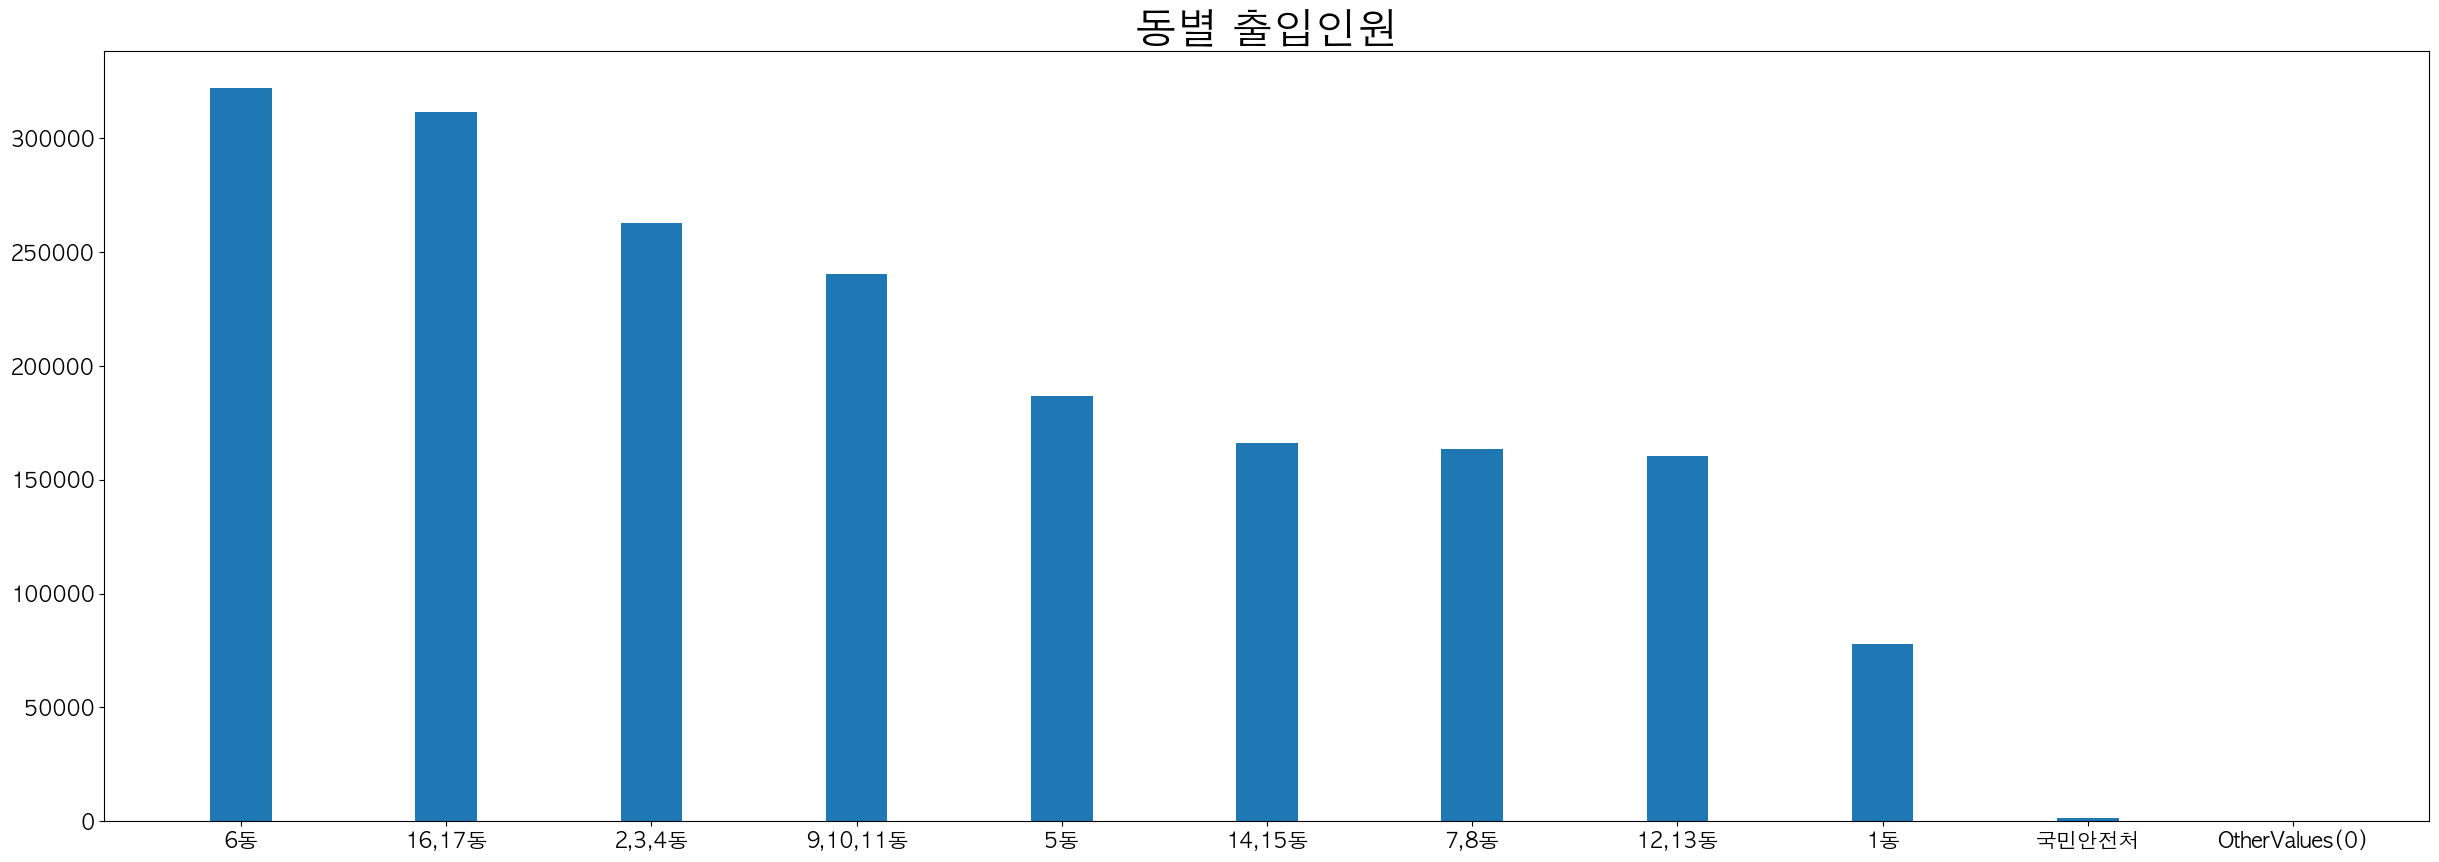

In [40]:
# 그래프 제목
graph_title = '동별 출입인원'
#표시 할 개수
top_n = 10
# 표시할 컬럼명
column_name = 'site_nm'

visualization(graph_title,top_n,column_name)

## 출입거부 비율

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/80435326.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


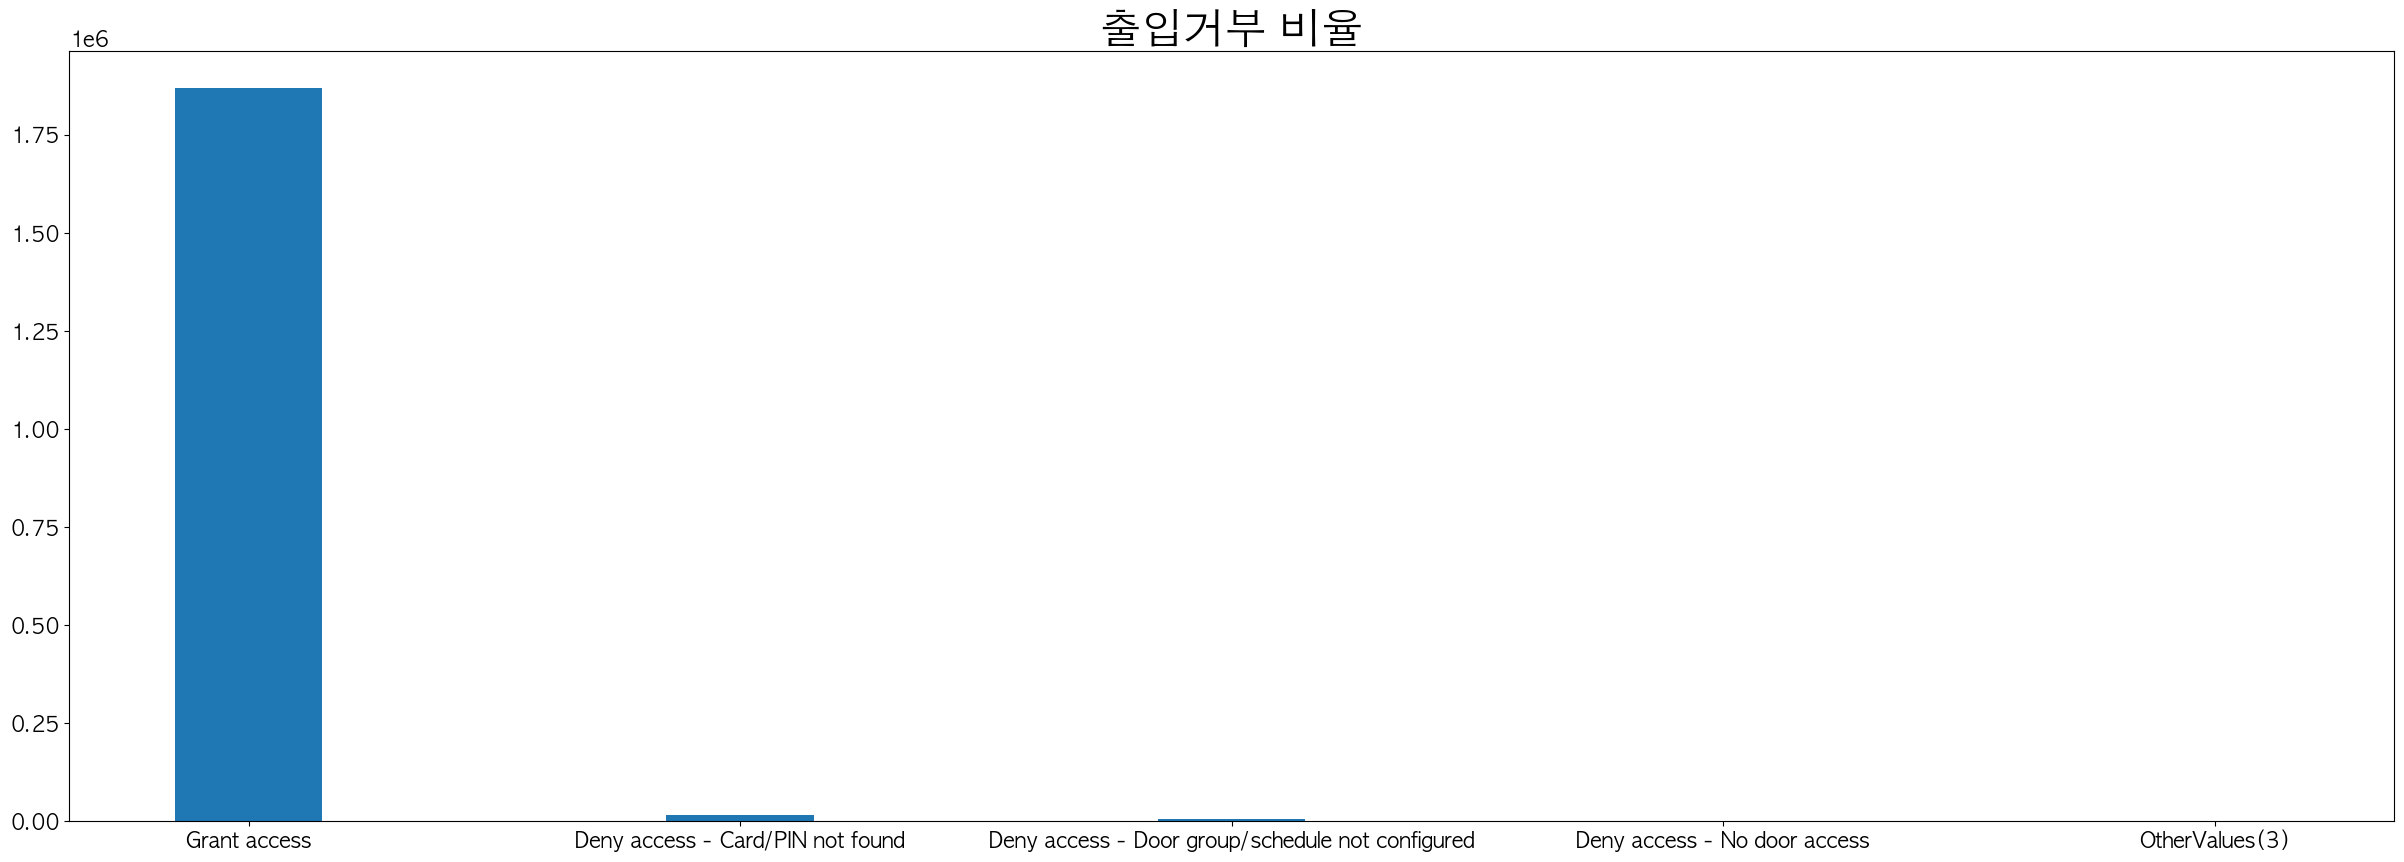

In [41]:
# 그래프 제목
graph_title = '출입거부 비율'
#표시 할 개수
top_n = 4
# 표시할 컬럼명
column_name = 'event_msg'

visualization(graph_title,top_n,column_name)

## 출입자 구분

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/80435326.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


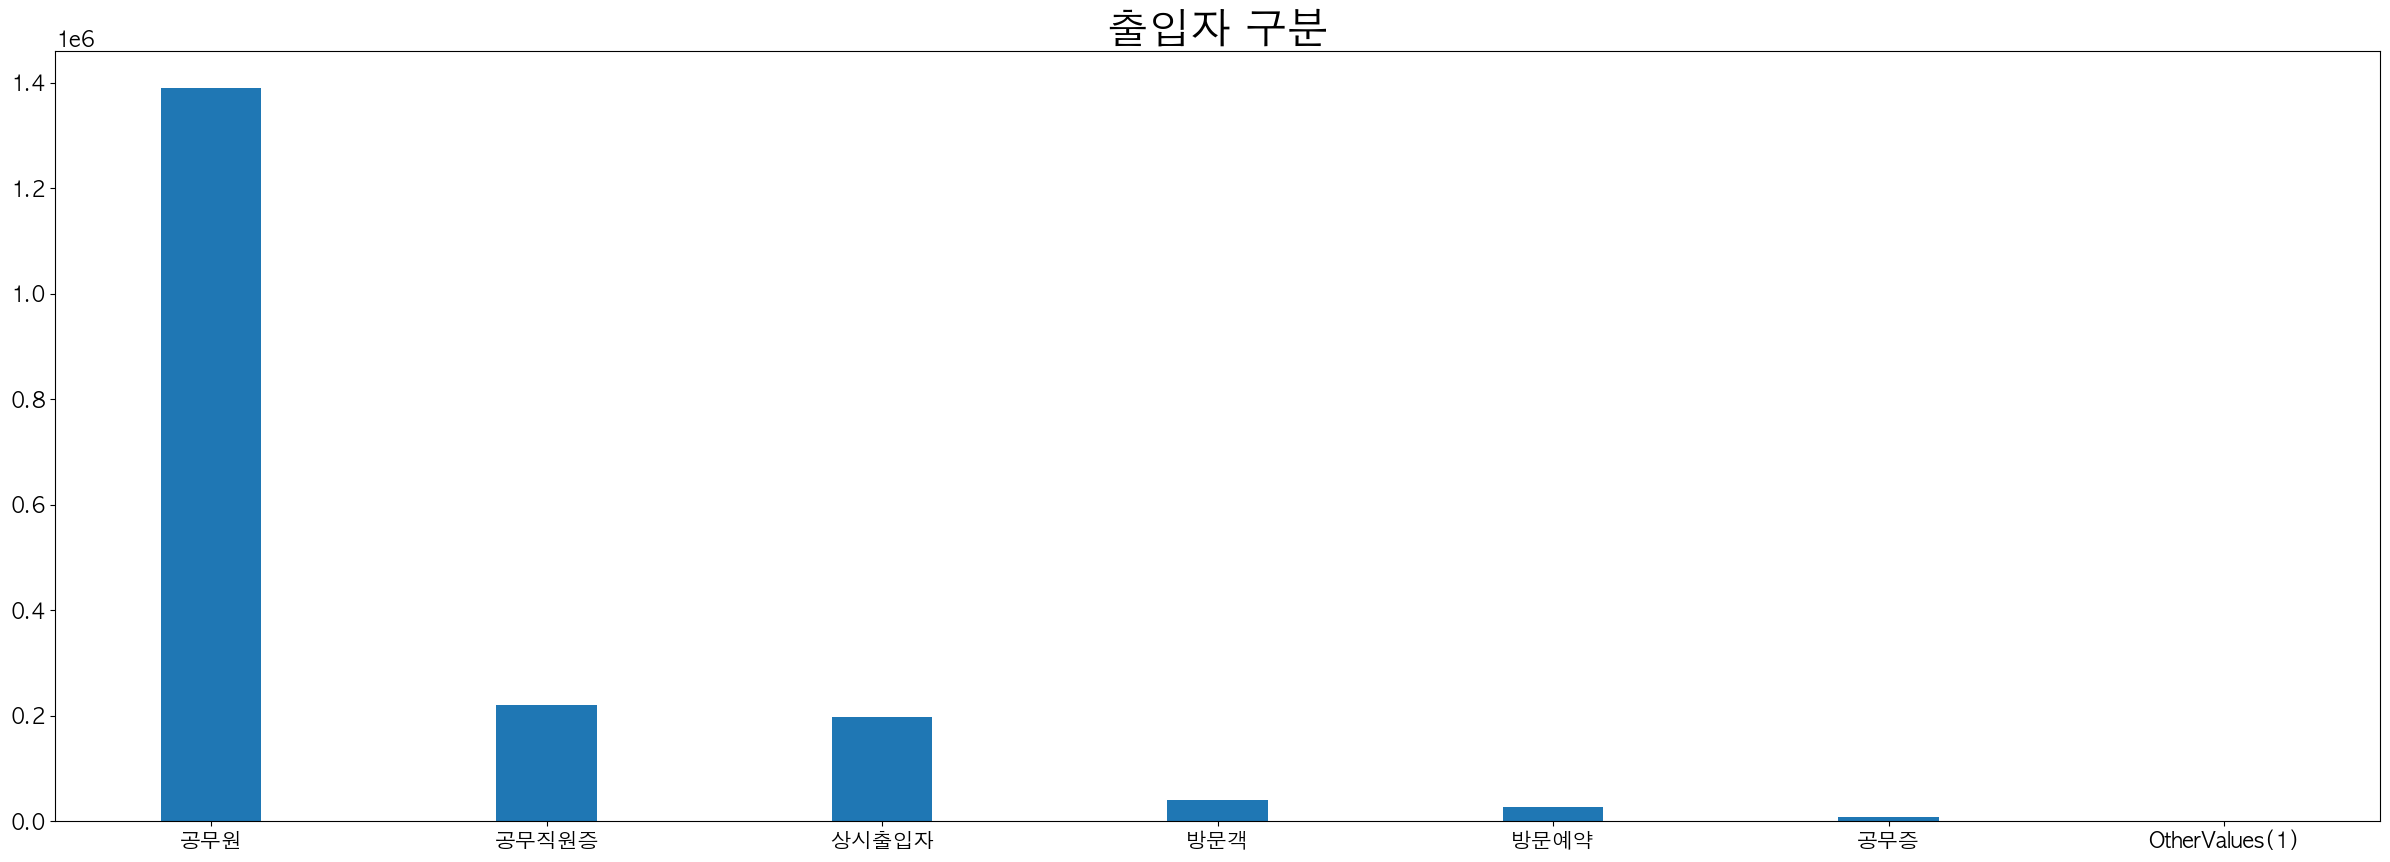

In [42]:
# 그래프 제목
graph_title = '출입자 구분'
#표시 할 개수
top_n = 6
# 표시할 컬럼명
column_name = 'emptype_nm'

visualization(graph_title,top_n,column_name)

## 부서별 출입 인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/2880263964.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


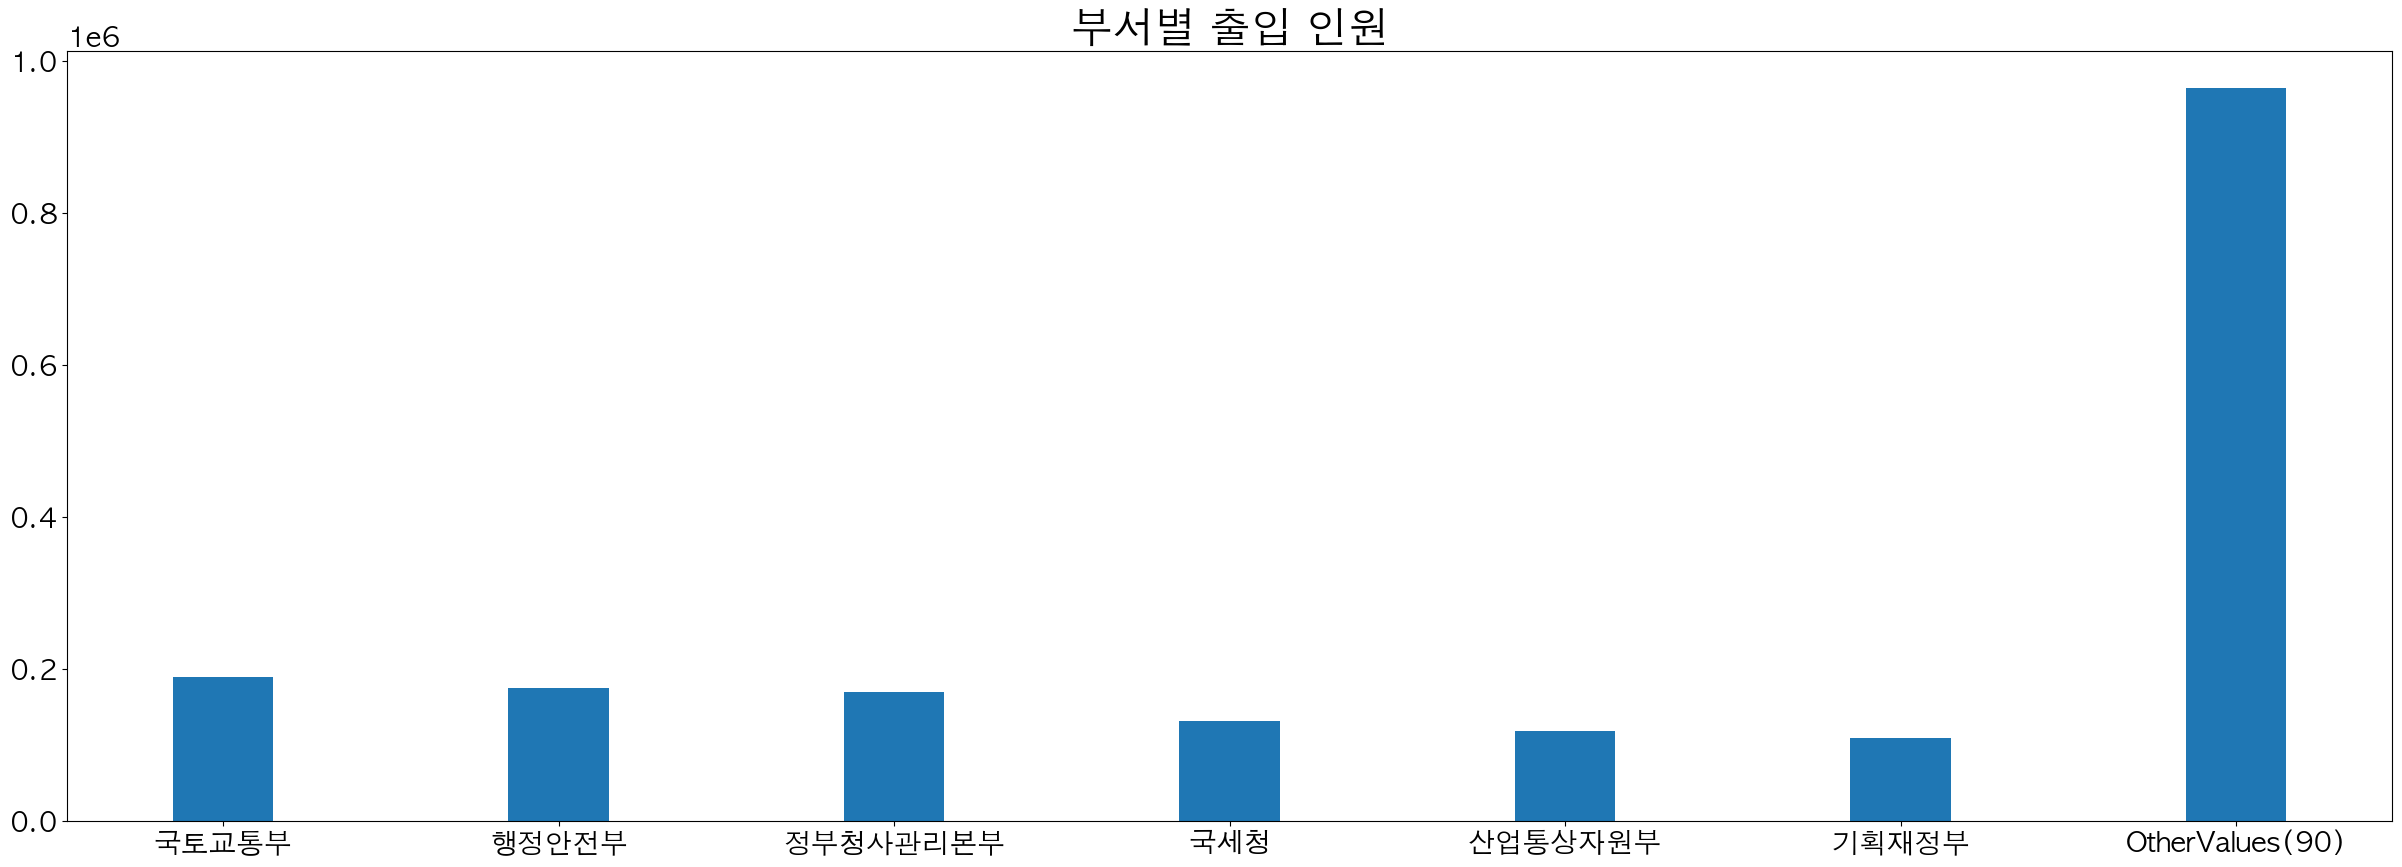

In [31]:
# 그래프 제목
graph_title = '부서별 출입 인원'
#표시 할 개수
top_n = 6
# 표시할 컬럼명
column_name = 'company_nm'

visualization(graph_title,top_n,column_name)

## 과별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/2880263964.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


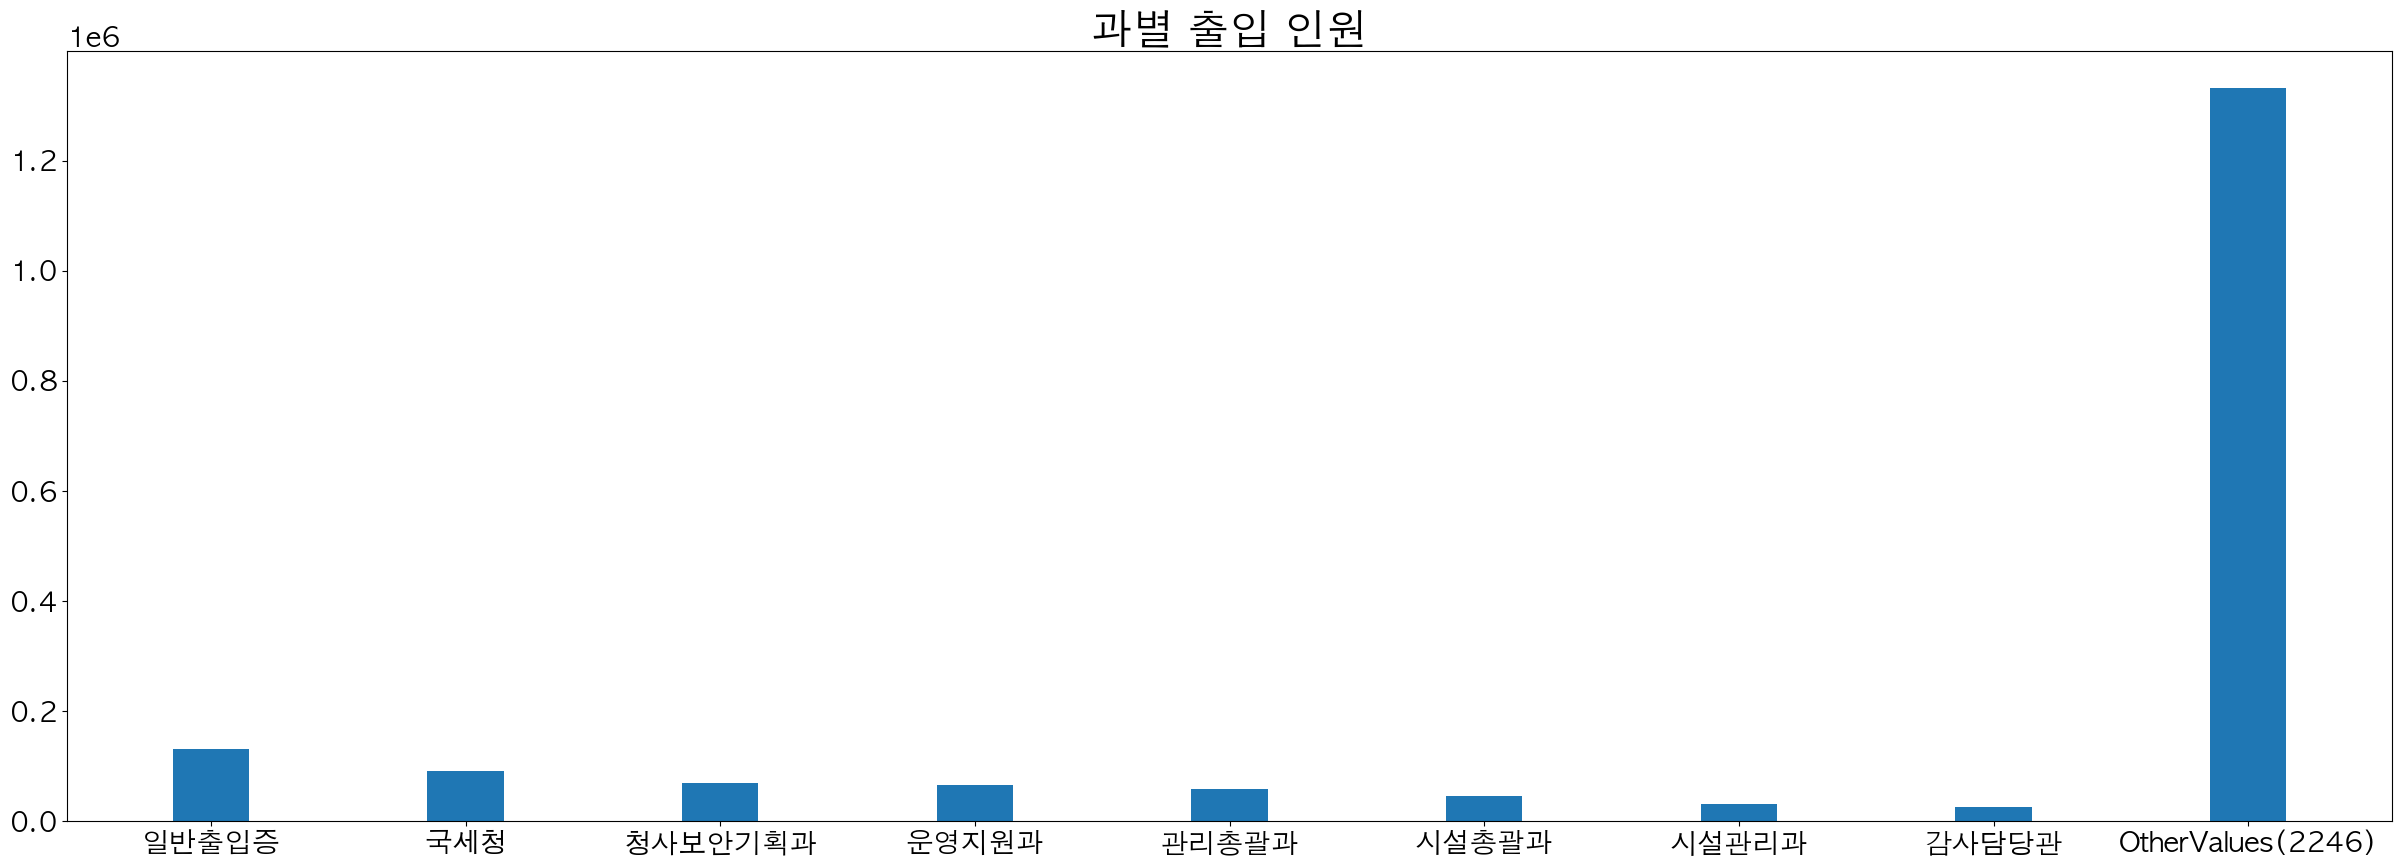

In [32]:
# 그래프 제목
graph_title = '과별 출입 인원'
#표시 할 개수
top_n = 8
# 표시할 컬럼명
column_name = 'department_nm'

visualization(graph_title,top_n,column_name)

## 직급 별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_58345/2880263964.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


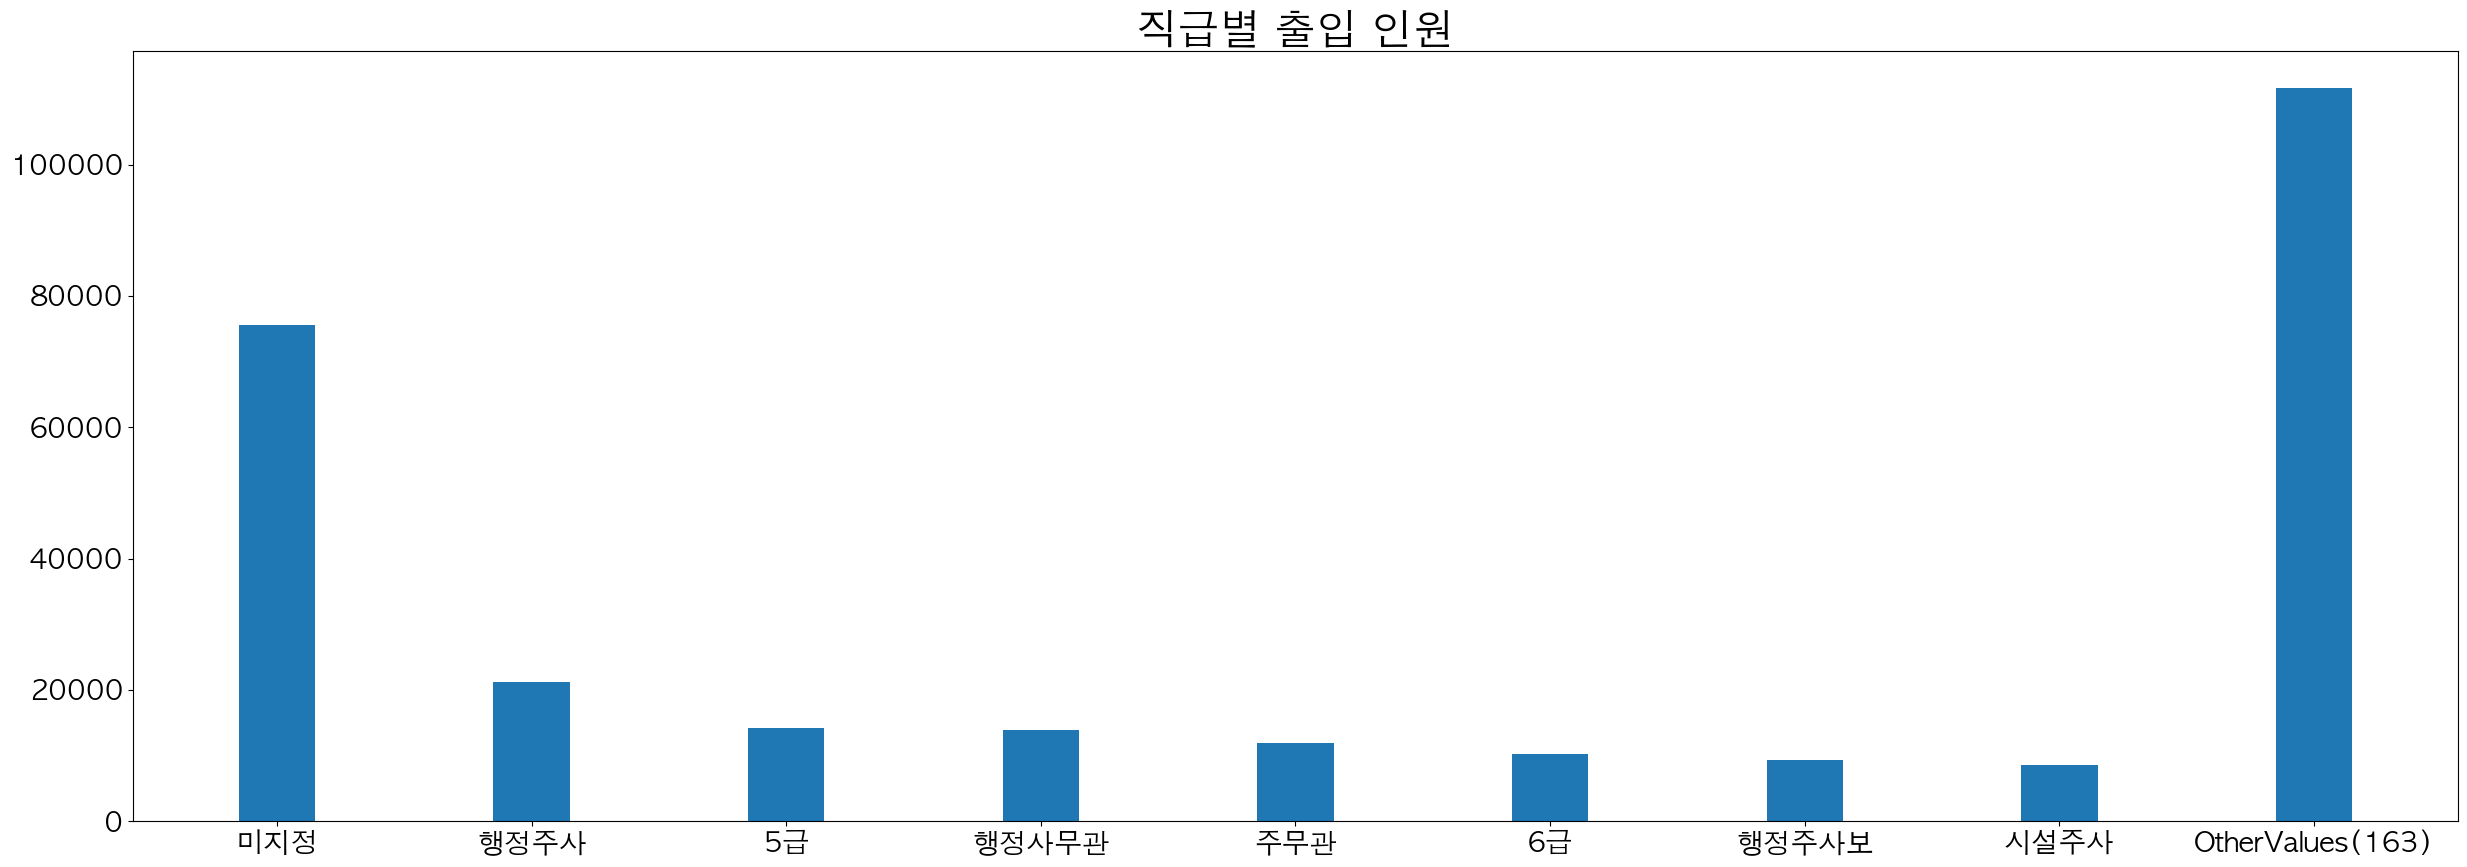

In [33]:
# 그래프 제목
graph_title = '직급별 출입 인원'
#표시 할 개수
top_n = 8
# 표시할 컬럼명
column_name = 'position_nm'

visualization(graph_title,top_n,column_name)

## 야간 출입인원

Text(0.5, 1.0, '야간출입인원')

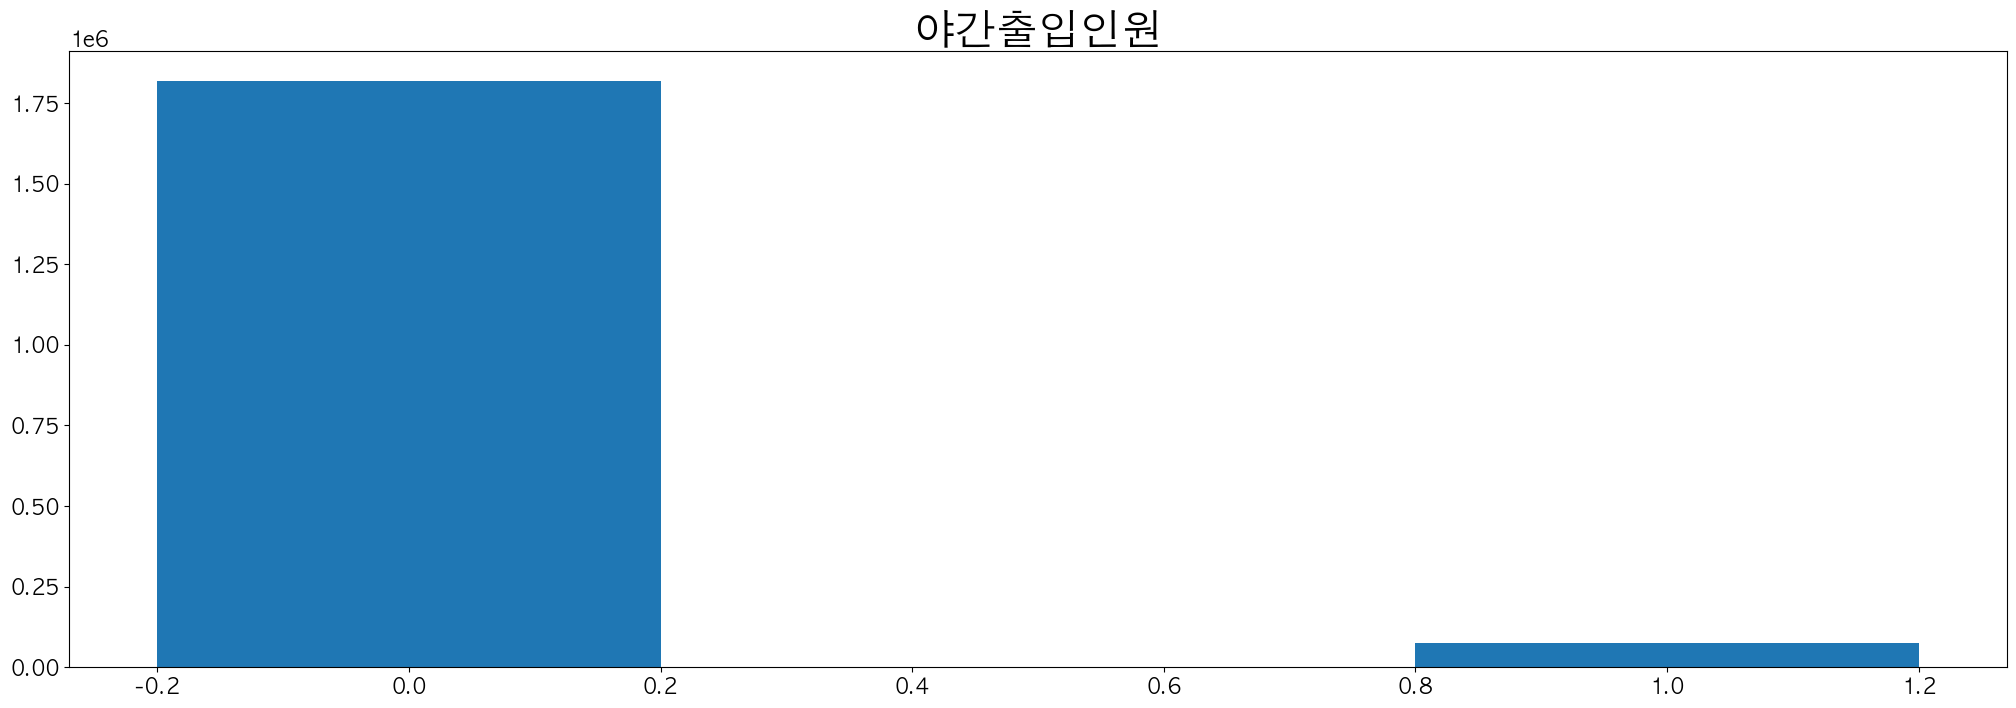

In [43]:
time = pd.DataFrame(df['night'].value_counts())
time.reset_index(inplace=True)
time = time.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(time['index'], time['night'], width=0.4)
plt.title('야간출입인원', fontsize = 30)

In [35]:
df

,index,seq,site_cd,site_nm,reader_cd,reader_nm,event_msg,card_no,regstatus_cd,regstatus_nm,...,position_cd,position_nm,insertedDate,rev1,rev2,rev3,rev4,rev5,night,reader_nm_fisrt
msgTime,,,,,,,,,,,,,,,,,,,,,
2022-10-04 00:00:02,0,308341342,SJ01-01,1동,0805R,1-B동 1층 스피드게이트2 출구,Grant access,0000010920001116,RegStatus0001,등록,...,Position0002,서기관,2022-10-04 00:00:02.887,0805R,NaN,NaN,NaN,N,1.0,1-B동
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0,5동
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0,5동
2022-10-04 00:00:03,1,308341343,SJ01-02-B,5동,B0103-17R,5동 로비2 스피드게이트2 OUT,Grant access,0000015430001877,RegStatus0001,등록,...,NaN,NaN,2022-10-04 00:00:03.967,B0103-17R,NaN,NaN,NaN,N,1.0,5동
2022-10-04 00:00:03,2,308341344,"SJ02-02-L,M","14,15동",L0104a-15R,14-2동 스피드 게이트 4 - OUT,Grant access,0000013420001683,RegStatus0001,등록,...,NaN,NaN,2022-10-04 00:00:03.903,L0104a-15R,NaN,NaN,NaN,N,1.0,14-2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20 23:59:57,1875206,310216555,"SJ02-02-L,M","14,15동",L0104a-12R,14-2동 스피드 게이트 1 - OUT,Grant access,0000013420002020,RegStatus0001,등록,...,NaN,NaN,2022-10-20 23:59:58.980,L0104a-12R,NaN,NaN,NaN,N,1.0,14-2동
2022-10-20 23:59:57,1875206,310216555,"SJ02-02-L,M","14,15동",L0104a-12R,14-2동 스피드 게이트 1 - OUT,Grant access,0000013420002020,RegStatus0001,등록,...,NaN,NaN,2022-10-20 23:59:58.980,L0104a-12R,NaN,NaN,NaN,N,1.0,14-2동
2022-10-20 23:59:57,1875206,310216555,"SJ02-02-L,M","14,15동",L0104a-12R,14-2동 스피드 게이트 1 - OUT,Grant access,0000013420002020,RegStatus0001,등록,...,NaN,NaN,2022-10-20 23:59:58.980,L0104a-12R,NaN,NaN,NaN,N,1.0,14-2동
